In [1]:
using CSV
using DataFrames
using GLM
using HypothesisTests
using PyPlot; const plt = PyPlot

PyPlot

In [2]:
waterstocks = CSV.read("WaterStocksAdj.csv");

In [3]:
first(waterstocks, 5)

,date,CTWS,WTR,AWR
,String,Float64,Float64,Float64
1,1/2/1997,13.0,4.49281,7.29167
2,1/3/1997,13.0,4.66561,7.29167
3,1/6/1997,13.0,4.63681,7.33333
4,1/7/1997,13.2222,4.60801,7.33333
5,1/8/1997,13.3333,4.63681,7.41667


In [4]:
CTWS = Vector((waterstocks.CTWS));

In [5]:
logCTWS= Vector(log.(CTWS));

In [6]:
WTR = Vector((waterstocks.WTR));

In [7]:
logWTR= Vector(log.(WTR));

In [8]:
AWR = Vector((waterstocks.AWR));

In [9]:
logAWR= Vector(log.(AWR));

In [10]:
test1CTWS = ADFTest(logCTWS, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          5.347555022625097e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8109

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      0.4406442232052007
    Critical values at 1%, 5%, and 10%: [-2.566480728805754 -1.9410893082168827 -1.6167323496339332]


In [11]:
test1WTR = ADFTest(logWTR, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          0.00012518468174065023

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8939

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      0.8532389403811692
    Critical values at 1%, 5%, and 10%: [-2.566480728805754 -1.9410893082168827 -1.6167323496339332]


In [12]:
test1AWR = ADFTest(logAWR, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          7.819460727480682e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8336

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      0.538629347197427
    Critical values at 1%, 5%, and 10%: [-2.566480728805754 -1.9410893082168827 -1.6167323496339332]


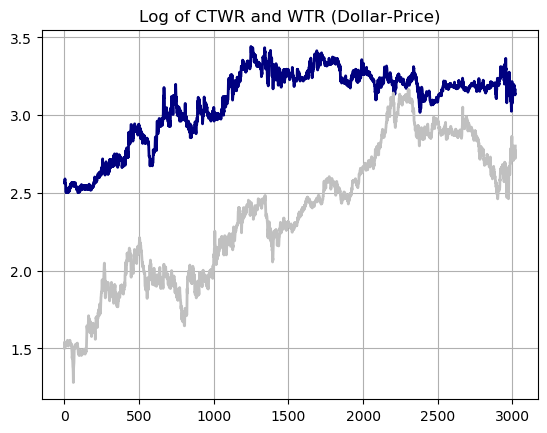

In [13]:
plt.plot(logCTWS, color="navy", linewidth=2);
plt.plot(logWTR, color="silver", linewidth=2);
plt.title("Log of CTWR and WTR (Dollar-Price)");
plt.grid(true);

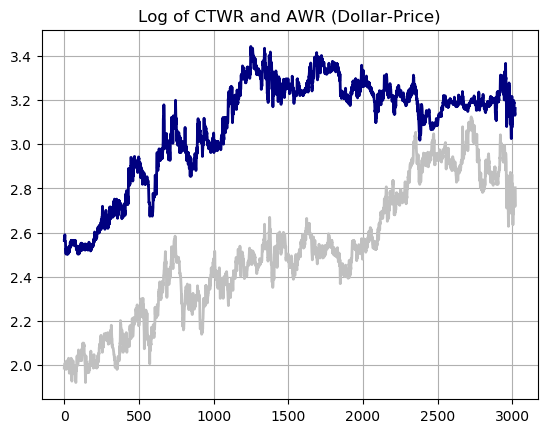

In [14]:
plt.plot(logCTWS, color="navy", linewidth=2);
plt.plot(logAWR, color="silver", linewidth=2);
plt.title("Log of CTWR and AWR (Dollar-Price)");
plt.grid(true);

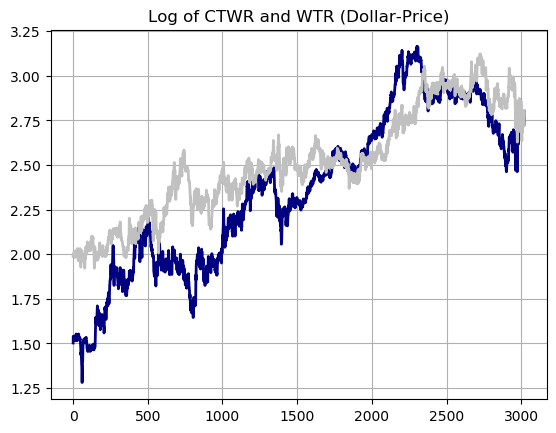

In [15]:
plt.plot(logWTR, color="navy", linewidth=2);
plt.plot(logAWR, color="silver", linewidth=2);
plt.title("Log of CTWR and WTR (Dollar-Price)");
plt.grid(true);

In [16]:
DlnCTWS = diff(logCTWS);
DlnWTR = diff(logWTR);
DlnAWR = diff(logAWR);

In [17]:
testDCTWS = ADFTest(DlnCTWS, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.3356244411263245

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -47.06501461930544
    Critical values at 1%, 5%, and 10%: [-2.566480974293206 -1.9410893379204353 -1.616732320699009]


In [18]:
testDWTR = ADFTest(DlnWTR, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.0377137375866827

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -40.22014250078128
    Critical values at 1%, 5%, and 10%: [-2.566480974293206 -1.9410893379204353 -1.616732320699009]


In [19]:
testDCAWR = ADFTest(DlnAWR, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.100068294354535

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -41.181149218349894
    Critical values at 1%, 5%, and 10%: [-2.566480974293206 -1.9410893379204353 -1.616732320699009]


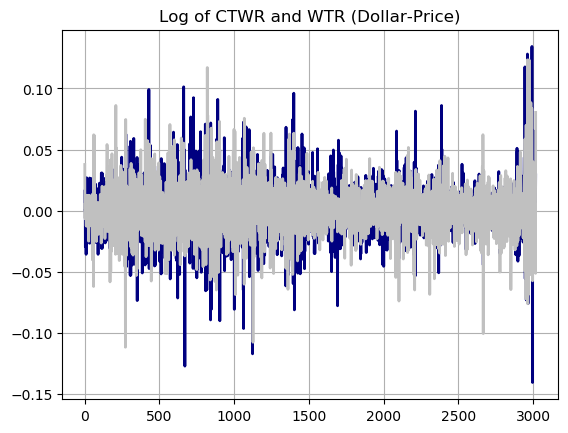

In [20]:
plt.plot(DlnCTWS, color="navy", linewidth=2);
plt.plot(DlnWTR, color="silver", linewidth=2);
plt.title("Log of CTWR and WTR (Dollar-Price)");
plt.grid(true);

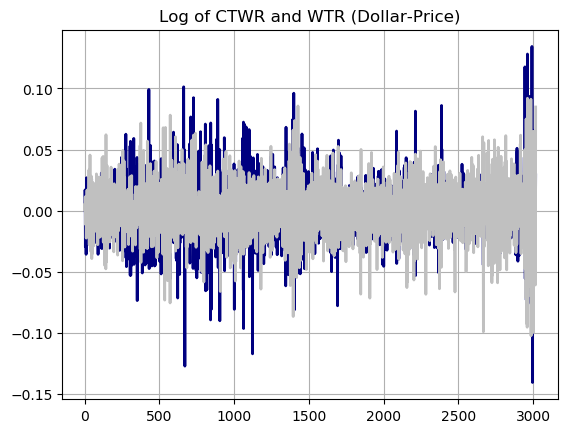

In [21]:
plt.plot(DlnCTWS, color="navy", linewidth=2);
plt.plot(DlnAWR, color="silver", linewidth=2);
plt.title("Log of CTWR and WTR (Dollar-Price)");
plt.grid(true);

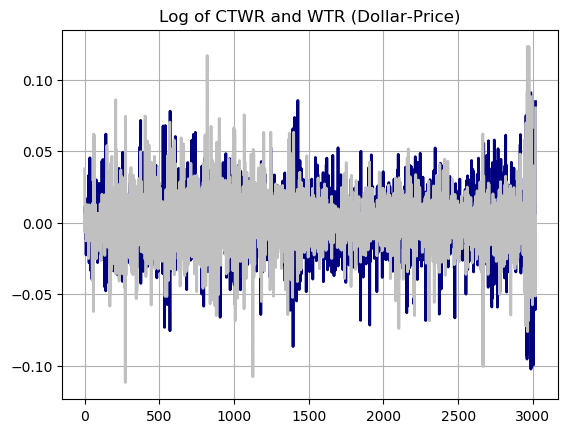

In [22]:
plt.plot(DlnAWR, color="navy", linewidth=2);
plt.plot(DlnWTR, color="silver", linewidth=2);
plt.title("Log of CTWR and WTR (Dollar-Price)");
plt.grid(true);